Contributors:
Kaixiang Liu
Jahn Tibayan
Jake Souza

Exploring CSUF Kinesiology dataset and predict total fitness factor score for each student

# Data prepartion

In [132]:
import pandas as pd
import numpy as np

df = pd.read_csv('Health-Science-Data.csv', index_col=None, skip_blank_lines=True)
df.head()

,Idnum,Date,Sex,Age,Ht,Wt,RF 2,RF 3,RF 4,RF 5,BIA_percent_Fat,SF 1,SF 2,SF 3,Waist,FF,RGM,LGM,VC,TA,PB,SBP,DBP,HR rest,Stages,PL 1,HR 1,RPE 1,PL 2,HR 2,RPE 2,PL 3,HR 3,RPE 3,FFTotal,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170
0,M0001,2002-2,M,19,65.0,195.4,5,1,1,0,NaN,23.0,38.0,21.0,NaN,5.0,55.0,52.0,3.70,23,767.0,136,86,72,3,50,122,12,100,148,13.0,150.0,174.0,16.0,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M0002,2002-2,M,19,68.5,201.4,5,2,2,0,NaN,13.6,31.0,11.6,NaN,1.5,60.5,62.0,4.00,19,766.0,124,72,72,3,50,107,8,125,131,12.0,200.0,172.0,15.0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M0003,2002-2,M,21,69.8,133.8,5,2,6,0,NaN,7.1,16.2,10.4,NaN,-2.0,47.0,76.5,4.40,22,765.0,120,68,72,3,50,119,10,100,144,17.0,150.0,172.0,20.0,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M0004,2002-2,M,18,66.0,148.0,5,1,6,0,NaN,7.0,25

In [133]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Columns: 171 entries, Idnum to Unnamed: 170
dtypes: float64(152), int64(16), object(3)
memory usage: 8.2+ MB


,Age,Ht,Wt,RF 2,RF 3,RF 4,RF 5,BIA_percent_Fat,SF 1,SF 2,SF 3,Waist,FF,RGM,LGM,VC,TA,PB,SBP,DBP,HR rest,Stages,PL 1,HR 1,RPE 1,PL 2,HR 2,RPE 2,PL 3,HR 3,RPE 3,FFTotal,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170
count,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,1596.000000,4680.000000,4680.000000,4680.000000,748.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,6276.000000,5896.000000,5896.000000,5883.000000,6276.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,19.597196,66.210747,147.396303,2.695347,2.442798,1.288400,0.163639,20.046805,16.682874,21.135609,21.303333,75.557086,3.573375,39.088751,36.424618,3.848848,22.999203,757.525414,117.702358,69.923359,71.620300,3.015934,40.527087,118.559911,8.620459,82.086361,140.423678,11.508445,127.992198,164.266282,14.476798,37.260357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.496967,3.820155,33.001523,1.976818,0.700195,0.783088,0.604754,7.996257,8.593706,9.838017,9.760332,10.480083,3.142256,11.665983,11.524033,0.915923,1.137621,5.062395,12.197864,9.010080,4.767389,0.366399,10.103389,22.995757,2.007712,30.076956,15.742755,2.171861,47.496793,11.834510,2.407118,9.201547,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [134]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


BIA_percent_Fat    4680
SF 1               1596
SF 2               1596
SF 3               1596
Waist              5528
PL 3                380
HR 3                380
RPE 3               393
Unnamed: 35        6276
Unnamed: 36        6276
Unnamed: 37        6276
Unnamed: 38        6276
Unnamed: 39        6276
Unnamed: 40        6276
Unnamed: 41        6276
Unnamed: 42        6276
Unnamed: 43        6276
Unnamed: 44        6276
Unnamed: 45        6276
Unnamed: 46        6276
Unnamed: 47        6276
Unnamed: 48        6276
Unnamed: 49        6276
Unnamed: 50        6276
Unnamed: 51        6276
Unnamed: 52        6276
Unnamed: 53        6276
Unnamed: 54        6276
Unnamed: 55        6276
Unnamed: 56        6276
Unnamed: 57        6276
Unnamed: 58        6276
Unnamed: 59        6276
Unnamed: 60        6276
Unnamed: 61        6276
Unnamed: 62        6276
Unnamed: 63        6276
Unnamed: 64        6276
Unnamed: 65        6276
Unnamed: 66        6276
Unnamed: 67        6276
Unnamed: 68     

In [135]:

pd.set_option('display.max_columns', None) 
print(df.columns)


Index(['Idnum', 'Date', 'Sex', 'Age', 'Ht', 'Wt', 'RF 2', 'RF 3', 'RF 4',
       'RF 5',
       ...
       'Unnamed: 161', 'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164',
       'Unnamed: 165', 'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168',
       'Unnamed: 169', 'Unnamed: 170'],
      dtype='object', length=171)


# 1. Exploratorty Data Analysis

From the data dictionary, we selected five variables that are likely to be important. They are: [Age,Wt,Ht,BIA_percent_Fat,Waist]

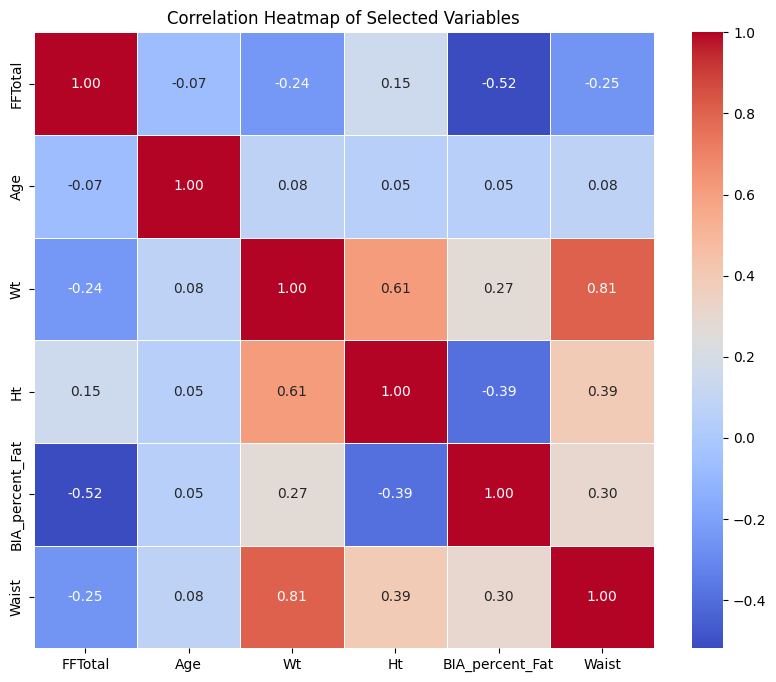

In [136]:
# Correlation heatmap
selected_vars = ['FFTotal', 'Age', 'Wt', 'Ht', 'BIA_percent_Fat', 'Waist']
correlation_matrix = df[selected_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()


However, it seems like the only variable that is related to FFTotal is BIA_Percent_Fat. Now we use a random forrest model to determine the most important features

First, we need to do some data preprocessing

In [137]:
na_counts_sorted = df.isna().sum().sort_values(ascending=False)
print(na_counts_sorted)

Unnamed: 85        6276
Unnamed: 117       6276
Unnamed: 109       6276
Unnamed: 110       6276
Unnamed: 111       6276
Unnamed: 112       6276
Unnamed: 113       6276
Unnamed: 114       6276
Unnamed: 115       6276
Unnamed: 116       6276
Unnamed: 118       6276
Unnamed: 128       6276
Unnamed: 119       6276
Unnamed: 120       6276
Unnamed: 121       6276
Unnamed: 122       6276
Unnamed: 123       6276
Unnamed: 124       6276
Unnamed: 125       6276
Unnamed: 126       6276
Unnamed: 108       6276
Unnamed: 107       6276
Unnamed: 106       6276
Unnamed: 105       6276
Unnamed: 88        6276
Unnamed: 89        6276
Unnamed: 90        6276
Unnamed: 91        6276
Unnamed: 92        6276
Unnamed: 93        6276
Unnamed: 94        6276
Unnamed: 95        6276
Unnamed: 96        6276
Unnamed: 97        6276
Unnamed: 98        6276
Unnamed: 99        6276
Unnamed: 100       6276
Unnamed: 101       6276
Unnamed: 102       6276
Unnamed: 103       6276
Unnamed: 104       6276
Unnamed: 127    

In [138]:
# convert 'Sex' column: M -> 1, F -> 2
df['Sex'] = df['Sex'].replace({'M': 1, 'F': 2})

print(df['Sex'].head())


0    1
1    1
2    1
3    1
4    1
Name: Sex, dtype: int64


In [139]:
# There are a bunch of empty columns. Not sure why they were included, they are just pure blanks
# We are dropping columns where all values are na
df = df.dropna(axis=1, how='all')

# Verify that the empty columns are gone
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Idnum            6276 non-null   object 
 1   Date             6276 non-null   object 
 2   Sex              6276 non-null   int64  
 3   Age              6276 non-null   int64  
 4   Ht               6276 non-null   float64
 5   Wt               6276 non-null   float64
 6   RF 2             6276 non-null   int64  
 7   RF 3             6276 non-null   int64  
 8   RF 4             6276 non-null   int64  
 9   RF 5             6276 non-null   int64  
 10  BIA_percent_Fat  1596 non-null   float64
 11  SF 1             4680 non-null   float64
 12  SF 2             4680 non-null   float64
 13  SF 3             4680 non-null   float64
 14  Waist            748 non-null    float64
 15  FF               6276 non-null   float64
 16  RGM              6276 non-null   float64
 17  LGM           

In [140]:
# Next we need to drop two columns that have high number of missing values
# They are Waist and BIA_percent_Fat
df = df.drop(columns=['Waist', 'BIA_percent_Fat'])


In [ ]:
# Next, fill skinFold values, SF, with an imputer
# This imputer will look at the other columns, specified and predict the missing values
# This is a better method than using pure mean or median values, though those values are robust, we just want to be more accurate
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select the variables for imputation
columns_to_impute = ['SF 1', 'SF 2', 'SF 3', 'Age', 'Ht', 'Wt', 'Sex', 'FF', 'RGM', 'LGM', 'Stages']

# Apply the imputer
imputer = IterativeImputer(random_state=42)
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify the results
print(df[['SF 1', 'SF 2', 'SF 3']].isna().sum())


SF 1    0
SF 2    0
SF 3    0
dtype: int64


In [145]:
# For the remaining missing values, we will use the median value for each column
# Fill missing values in SF 1, SF 2, and SF 3 with their respective medians
df['RPE 3'] = df['RPE 3'].fillna(df['RPE 3'].median())
df['HR 3'] = df['HR 2'].fillna(df['HR 2'].median())
df['PL 3'] = df['PL 3'].fillna(df['PL 3'].median())


In [146]:
na_counts_sorted = df.isna().sum().sort_values(ascending=False)
print(na_counts_sorted)



Idnum      0
TA         0
RPE 3      0
HR 3       0
PL 3       0
RPE 2      0
HR 2       0
PL 2       0
RPE 1      0
HR 1       0
PL 1       0
Stages     0
HR rest    0
DBP        0
SBP        0
PB         0
VC         0
Date       0
LGM        0
RGM        0
FF         0
SF 3       0
SF 2       0
SF 1       0
RF 5       0
RF 4       0
RF 3       0
RF 2       0
Wt         0
Ht         0
Age        0
Sex        0
FFTotal    0
dtype: int64


Now we have finished data preprocessing, we can use a RandomForest model to obtain the most important features.

In [147]:
from sklearn.ensemble import RandomForestRegressor

# Define X (predictor variables) and y (target variable)
X = df.drop(columns=['FFTotal', 'Idnum', 'Date'])  # Exclude the target and irrelevant columns
y = df['FFTotal']  # Target variable

# Train a random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame of feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


    Feature  Importance
9      SF 2    0.300004
11       FF    0.163065
25     HR 2    0.088636
28     HR 3    0.084030
8      SF 1    0.072195
10     SF 3    0.051469
12      RGM    0.047641
14       VC    0.027811
3        Wt    0.023910
13      LGM    0.021670
24     PL 2    0.020073
27     PL 3    0.011676
22     HR 1    0.011648
18      DBP    0.009003
16       PB    0.008949
17      SBP    0.008842
2        Ht    0.008517
29    RPE 3    0.007071
26    RPE 2    0.005941
23    RPE 1    0.005779
1       Age    0.004787
15       TA    0.003836
20   Stages    0.002984
19  HR rest    0.002915
5      RF 3    0.002761
6      RF 4    0.001663
7      RF 5    0.001038
21     PL 1    0.000892
0       Sex    0.000659
4      RF 2    0.000536


Now visualize the most important features

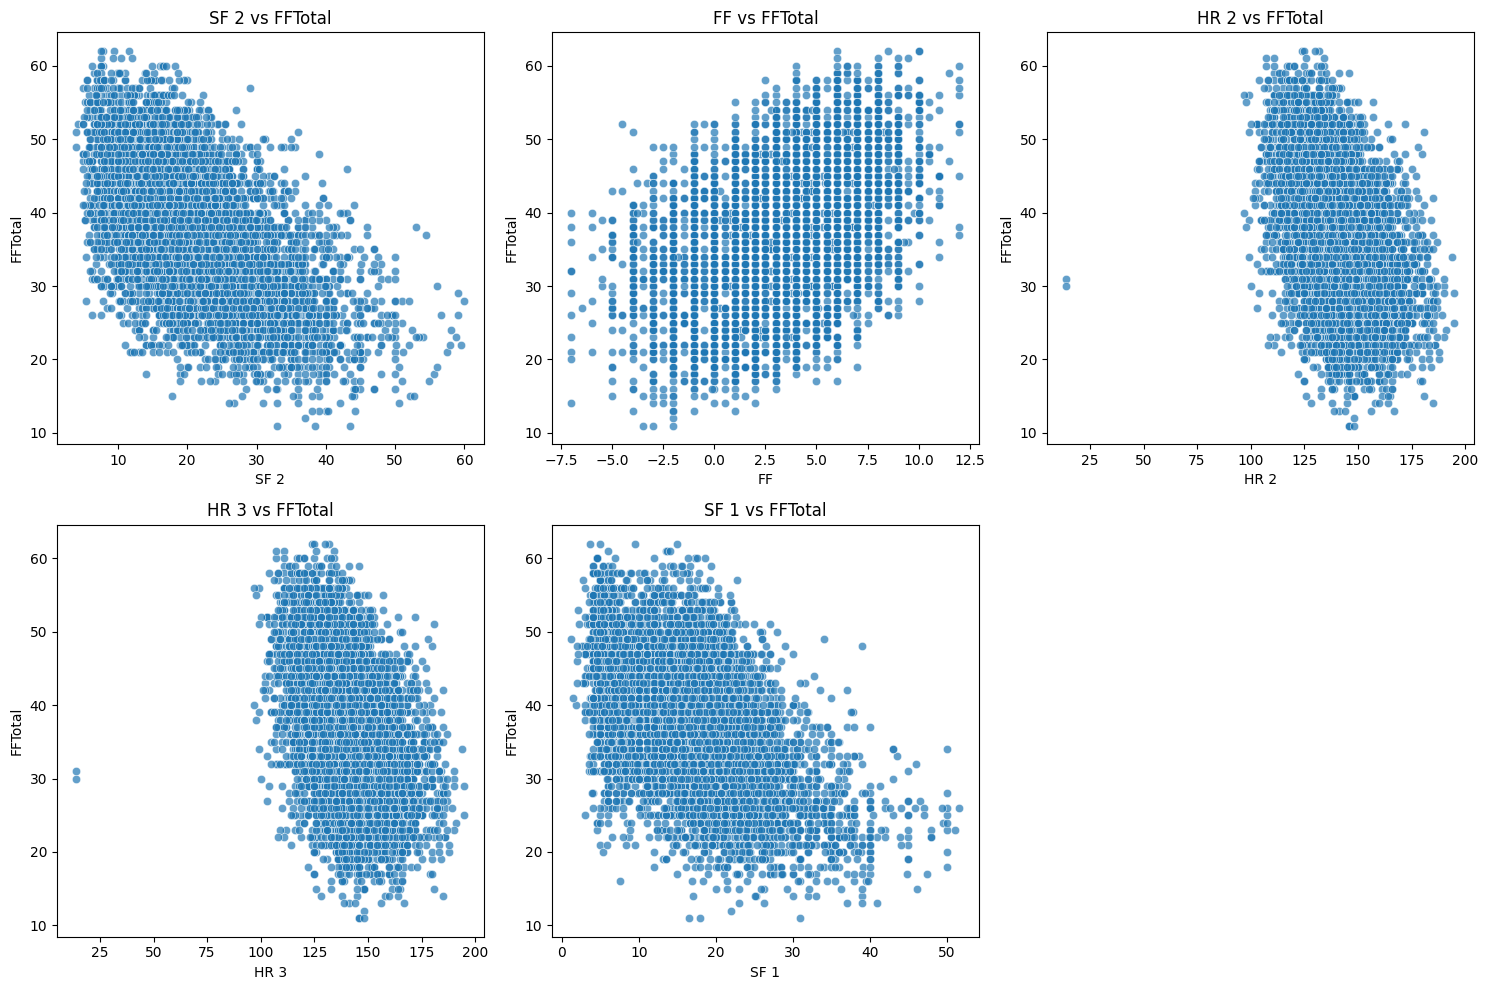

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of top 5 features
top_features = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1']

# Create scatter plots for each feature against FFTotal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='FFTotal', alpha=0.7)
    plt.title(f'{feature} vs FFTotal')
    plt.xlabel(feature)
    plt.ylabel('FFTotal')

plt.tight_layout()
plt.show()


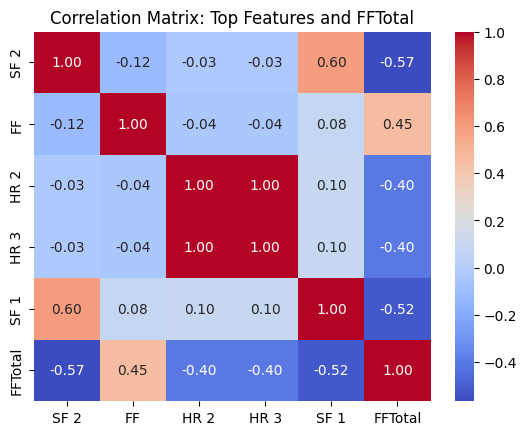

In [149]:
# Heatmap for correlations
import seaborn as sns
import matplotlib.pyplot as plt

top_features = ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1', 'FFTotal']
correlation_matrix = df[top_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Top Features and FFTotal')
plt.show()


From these visualizations, we can see that the top five features are: ['SF 2', 'FF', 'HR 2', 'HR 3', 'SF 1']

# 2. Linear model to predict FFTotal

- Generate some (at least 3) transformed variables. E.g., these could combine variables (e.g., bmi = Wt / Ht**2).
- Split your dataset into equal-sized train and test subsets (randomly chosen): The train subset should be used for building/training the linear models. Use statsmodels or scikit-learn as appropriate.
- Run linear regression with at least 5 different combinations of predictor variables. Hint: a model created with the statsmodels formula API might look like: FFTotal ~ Age + Wt + Waist

